In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_/USDJPY_M15.csv', sep='\t')
df = df.rename(columns={'<CLOSE>': 'PrecoAtual',
                        '<TICKVOL>': 'Volume',
                        '<DATE>': 'Date'})
df.head()

,Date,<TIME>,<OPEN>,<HIGH>,<LOW>,PrecoAtual,Volume,<VOL>,<SPREAD>
0,2024.01.02,00:00:00,140.830,140.871,140.816,140.852,59,0,12
1,2024.01.02,00:15:00,140.857,140.935,140.857,140.885,108,0,5
2,2024.01.02,00:30:00,140.887,140.961,140.871,140.886,95,0,20
3,2024.01.02,00:45:00,140.886,140.901,140.858,140.881,90,0,22
4,2024.01.02,01:00:00,140.914,140.917,140.807,140.820,1279,0,10


In [3]:
df = df[['PrecoAtual', 'Volume']]

In [4]:
df['Media'] = df['PrecoAtual'].rolling(20).mean()

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 19 to 2303
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PrecoAtual  2285 non-null   float64
 1   Volume      2285 non-null   int64  
 2   Media       2285 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 71.4 KB


In [7]:

# Supondo que 'df' é seu DataFrame contendo as colunas 'PrecoAtual', 'Volume', 'Media'
# df = pd.read_csv('seu_arquivo_de_dados.csv')

In [8]:
# Pré-processamento dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[['PrecoAtual', 'Volume', 'Media']])

In [9]:
scaled_features[0]

array([0.02876435, 0.0702293 , 0.        ])

In [10]:
sd = np.array(df)

In [11]:
sd[0]

array([ 141.559 , 1896.    ,  141.1717])

In [12]:
df.head()

,PrecoAtual,Volume,Media
19,141.559,1896,141.17170
20,141.529,1596,141.20555
21,141.655,1710,141.24405
22,141.597,1657,141.27960
23,141.498,1023,141.31045


In [13]:
# Preparar dados de entrada para LSTM

def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(X[i + time_steps, 0])  # Previsão do próximo preço
    return np.array(Xs), np.array(ys)


time_steps = 5
X, y = create_dataset(scaled_features, time_steps)

In [14]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
# Criar o modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(
        X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50,
                    batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
52/52 [==============================] - 2s 11ms/step - loss: 0.0661 - val_loss: 0.0040
Epoch 2/50
52/52 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 5.4104e-04
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 7.3255e-04 - val_loss: 4.8538e-04
Epoch 4/50
52/52 [==============================] - 0s 4ms/step - loss: 6.6903e-04 - val_loss: 4.7666e-04
Epoch 5/50
52/52 [==============================] - 0s 4ms/step - loss: 6.5449e-04 - val_loss: 4.5349e-04
Epoch 6/50
52/52 [==============================] - 0s 4ms/step - loss: 6.3154e-04 - val_loss: 4.6681e-04
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 6.1913e-04 - val_loss: 4.3188e-04
Epoch 8/50
52/52 [==============================] - 0s 4ms/step - loss: 5.9107e-04 - val_loss: 4.1199e-04
Epoch 9/50
52/52 [==============================] - 0s 5ms/step - loss: 5.8022e-04 - val_loss: 3.8744e-04
Epoch 10/50
52/52 [==============================] - 0s 4

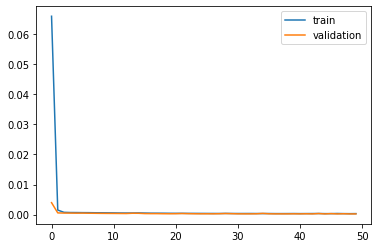

In [17]:
# Avaliar o modelo
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [18]:
# Fazer previsões
predicted_prices = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [19]:
predicted_prices

array([[0.43807   ],
       [0.659455  ],
       [0.91652286],
       [0.82063216],
       [0.7043485 ],
       [0.4838642 ],
       [0.5224694 ],
       [0.51484156],
       [0.87306046],
       [0.8069033 ],
       [0.49568918],
       [0.91089976],
       [0.9104684 ],
       [0.84646875],
       [0.84358823],
       [0.9009234 ],
       [0.84657043],
       [0.46349195],
       [0.55571824],
       [0.92054677],
       [0.04234781],
       [0.8718892 ],
       [0.8433665 ],
       [0.892997  ],
       [0.87705356],
       [0.7209094 ],
       [0.83209604],
       [0.8105139 ],
       [0.8979509 ],
       [0.9032014 ],
       [0.5459681 ],
       [0.9163239 ],
       [0.7276275 ],
       [0.8052715 ],
       [0.41297564],
       [0.94492346],
       [0.8242803 ],
       [0.3664991 ],
       [0.91493934],
       [0.2825456 ],
       [0.8588207 ],
       [0.88042796],
       [0.58551955],
       [0.45676026],
       [0.67897743],
       [0.5265652 ],
       [0.6674325 ],
       [0.480

In [20]:
sd[:,][:]

array([[ 141.559  , 1896.     ,  141.1717 ],
       [ 141.529  , 1596.     ,  141.20555],
       [ 141.655  , 1710.     ,  141.24405],
       ...,
       [ 148.296  ,  272.     ,  148.3732 ],
       [ 148.359  ,  360.     ,  148.36515],
       [ 148.341  ,  572.     ,  148.3552 ]])

In [ ]:
# Reverter a normalização para os preços reais
predicted_prices = scaler.inverse_transform(predicted_prices)